# Project 2 : Investigate a Dataset of 10,000 movies from TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.Thsi dataset has coloumns which show the budget and revenue of the associated movie.
>
> On looking into the datset , we can as 2 important questions which revolves around budget , profit and rating of the movies
>
> 1. Did all good rated movies make profit for the production house ?
> 2. Did all high buget movies get good ratings ?

In [10]:
#Importing  pandas and matplot lib
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### Data  First Look.

In [11]:
#Load the CSV File.
df = pd.read_csv('tmdb-movies.csv')

# After Loading the dataset, we need to have a clear look into the data coloumns for relavence and filter out required feild.
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Data Cleaning (Import Needed Coloumns -> Remove rows with zero in (Budget,revenue) -> Calculate Profit and loss calculation)

In [12]:
# CReate the new dataframe with the required coloumns names.
df_tmdb = df.filter(['imdb_id','popularity','budget','revenue','original_title','genres','production_companies','release_date','vote_count','vote_average'], axis=1)
df_tmdb.head(2)


,imdb_id,popularity,budget,revenue,original_title,genres,production_companies,release_date,vote_count,vote_average
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1


In [16]:
# Remove the zero rows on budget,revenue,Popularity coloumn to improvise the analysis
df_tmdb = df_tmdb[df_tmdb.budget != 0]
df_tmdb = df_tmdb[df_tmdb.revenue != 0]
df_tmdb = df_tmdb[df_tmdb.popularity != 0]
df_tmdb.shape

(3855, 11)

In [14]:
# Calculate profit and loss coloumn using budget and revenue 

df_tmdb['PL Calculation'] = df_tmdb['revenue'] - df_tmdb['budget'] 
df_tmdb.head(2)


,imdb_id,popularity,budget,revenue,original_title,genres,production_companies,release_date,vote_count,vote_average,PL Calculation
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1363528810
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,228436354


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Did all good rated movies make profit for the production house ?

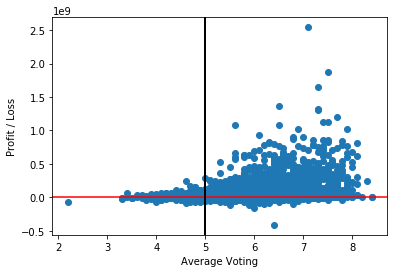

In [6]:
# Using a scatterplot and a horizontal and vertical line. We can analyse the scenario
# X axis is rating / Avarage Voting out of 10
# Y axis is profit and loss amount reading

plt.scatter(df_tmdb ['vote_average'],df_tmdb['PL Calculation'])
plt.xlabel('Average Voting')
plt.ylabel('Profit / Loss')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=5, linewidth=2, color='k')
plt.show()


### Research Question 2 : Did all high buget movies become popular ?

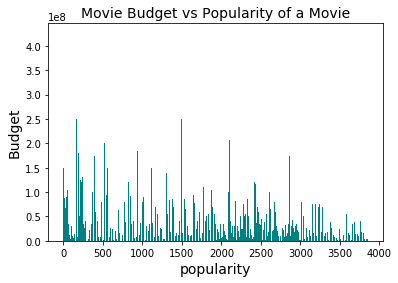

In [22]:
# As of todays trend very high budget movie like Marvel end game became popular even before it hit the screens (due to the moaunt sepent on marketing),There are very low buget movie 
#like Jhonwick 3 became termondus hit. Was this the history lets analyse.

xAxis = [i + .5 for i, _ in enumerate(df_tmdb['popularity'])] 
plt.bar(xAxis, df_tmdb['budget'].astype(float), color='teal')
plt.title('Movie Budget vs Popularity of a Movie', fontsize=14)
plt.xlabel('popularity', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.show()

<a id='conclusions'></a>
## Conclusions

> The from our above analysis, we can see historically most of good rated movie brought good revenue to the prodcution houses but there are around 10% of good rated movies failed at bok office also 2-3% of bad rated movies collected profits at box office.

> In the history it is very clear that the popularity of the movie doesnt depend on budget, very high budget movies even failed to become popula and most popular movies's buget is very less compared to others.
